<a href="https://colab.research.google.com/github/omniaghazy/Data-Preprocessing/blob/main/LogisticRegression(Titanic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
df = pd.read_csv("/content/titanic-Dataset.csv")

In [124]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [126]:
# This cell is for fixing outliers

# Add your code here to handle outliers

for col in df.select_dtypes(exclude="object").columns:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), df[col].median(), df[col])



In [127]:
def impute_train_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [128]:
df['Age'] = df[['Age','Pclass']].apply(impute_train_age,axis=1)

/tmp/ipython-input-1349784793.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/tmp/ipython-input-1349784793.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [129]:
# df["Age"] = df["Age"].fillna(df["Age"].mean())


In [130]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [131]:
LISTY1=[]
for index, row in df.iterrows():
  if row['Pclass'] == 1 and pd.notna(row['Cabin']):
    LISTY1.append(row['Cabin'])
mode_cabin1 = max(set(LISTY1), key = LISTY1.count)
print(f"mode_cabin1 = {mode_cabin1}")


LISTY2=[]
for index, row in df.iterrows():
  if row['Pclass'] == 2 and pd.notna(row['Cabin']):
    LISTY2.append(row['Cabin'])
mode_cabin2 = max(set(LISTY2), key = LISTY2.count)
print(f"mode_cabin2 = {mode_cabin2}")



LISTY3=[]
for index, row in df.iterrows():
  if row['Pclass'] == 3 and pd.notna(row['Cabin']):
    LISTY3.append(row['Cabin'])
mode_cabin3 = max(set(LISTY3), key = LISTY3.count)
print(f"mode_cabin3 = {mode_cabin3}")

mode_cabin1 = C23 C25 C27
mode_cabin2 = E101
mode_cabin3 = G6


In [132]:
mode_cabin1 = "C23"


In [133]:
df['Cabin'].dtype

dtype('O')

In [134]:
for index, row in df.iterrows():
  if pd.isna(row['Cabin']):
    if row['Pclass'] == 3:
      df.loc[index, 'Cabin'] = mode_cabin3
    elif row['Pclass'] == 2:
      df.loc[index, 'Cabin'] = mode_cabin2
    elif row['Pclass'] == 1:
      df.loc[index, 'Cabin'] = mode_cabin1

In [135]:
df['Cabin'].isna().sum()

np.int64(0)

In [136]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,G6,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,14.4542,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,G6,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,G6,S


In [137]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.0,891.000000
mean,446.000000,0.383838,2.308642,28.550696,0.297419,0.0,17.383622
std,257.353842,0.486592,0.836071,12.427836,0.521648,0.0,12.713016
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.0,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.0,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.0,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.0,24.150000
max,891.000000,1.000000,3.000000,64.000000,2.000000,0.0,65.000000


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(7), object(5)
memory usage: 83.7+ KB


In [139]:
for col in df.select_dtypes(exclude="object").columns:
  display(df[col].describe())
  print(f"nunique = {df[col].nunique()}")
  print(f"{df[col].isna().sum()}")
  print("==" *23)

,PassengerId
count,891.000000
mean,446.000000
std,257.353842
min,1.000000
25%,223.500000
50%,446.000000
75%,668.500000
max,891.000000


nunique = 891
0


,Survived
count,891.000000
mean,0.383838
std,0.486592
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


nunique = 2
0


,Pclass
count,891.000000
mean,2.308642
std,0.836071
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,3.000000


nunique = 3
0


,Age
count,891.000000
mean,28.550696
std,12.427836
min,0.420000
25%,22.000000
50%,26.000000
75%,36.000000
max,64.000000


nunique = 81
0


,SibSp
count,891.000000
mean,0.297419
std,0.521648
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


nunique = 3
0


,Parch
count,891.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


nunique = 1
0


,Fare
count,891.000000
mean,17.383622
std,12.713016
min,0.000000
25%,7.910400
50%,14.454200
75%,24.150000
max,65.000000


nunique = 203
0


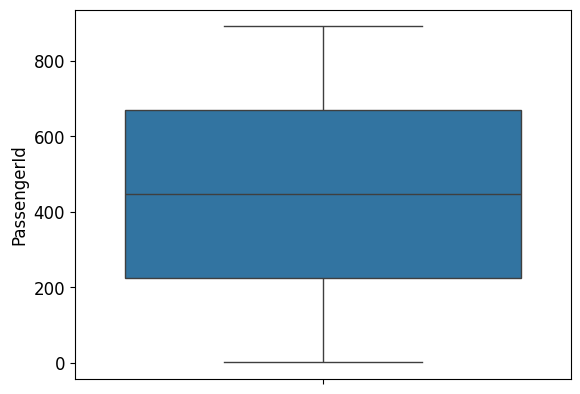

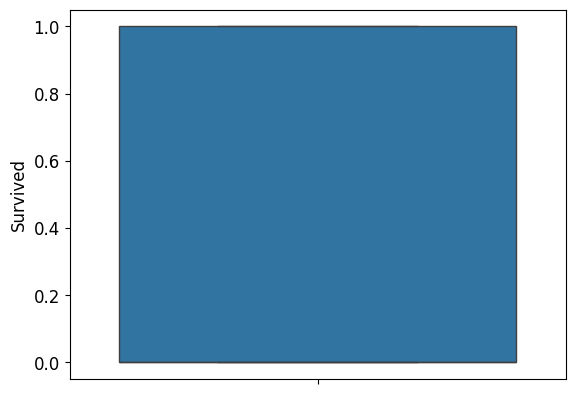

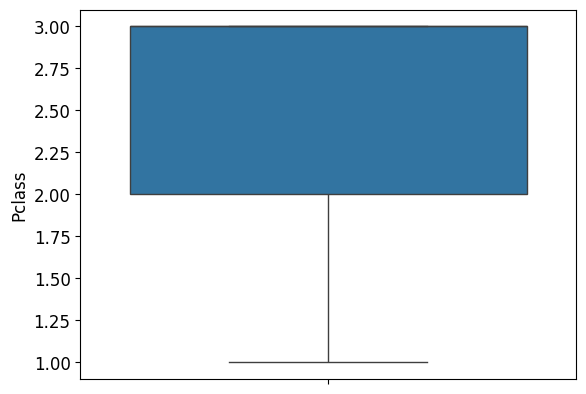

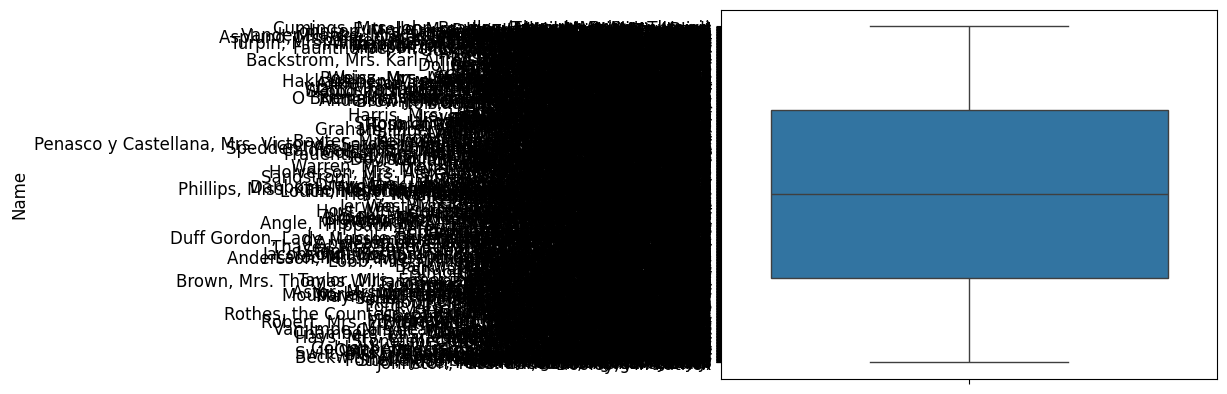

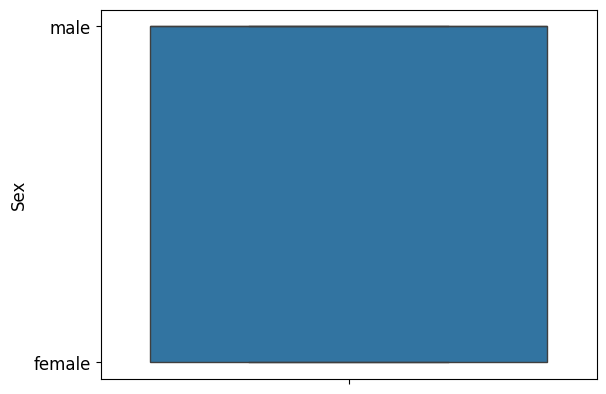

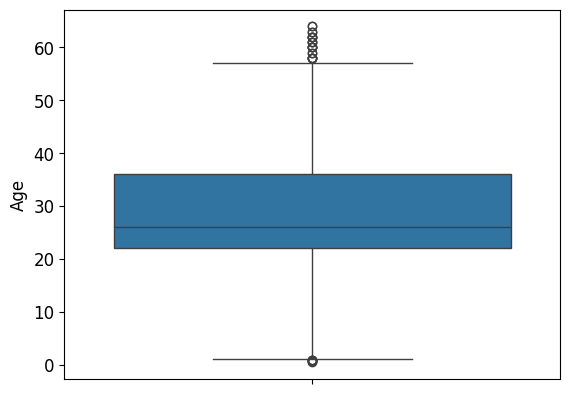

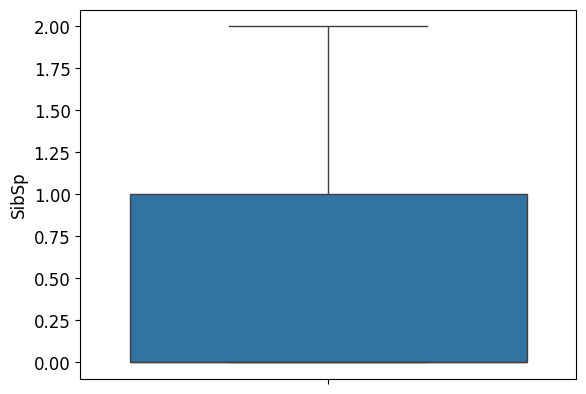

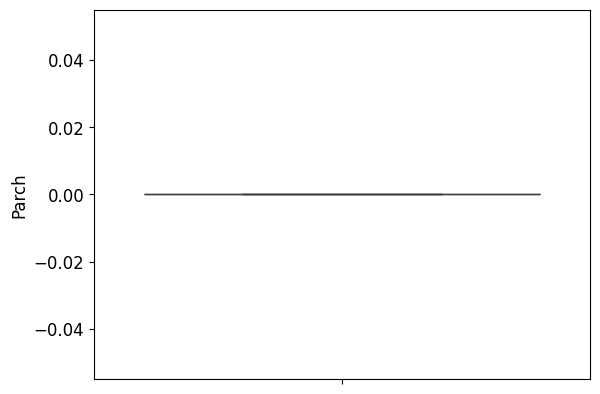

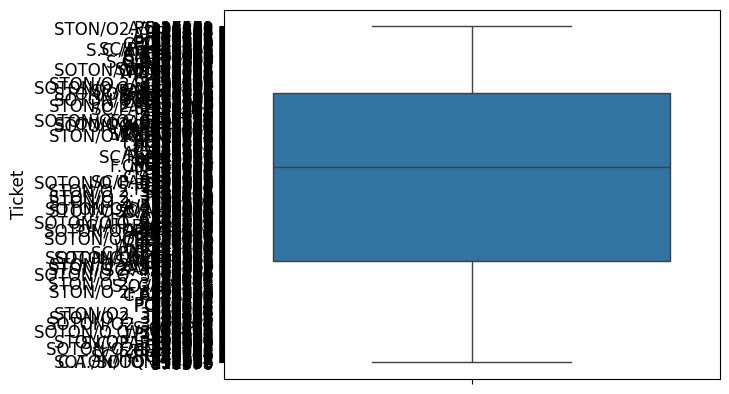

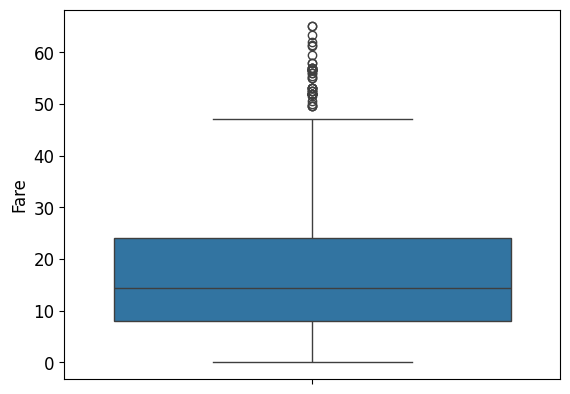

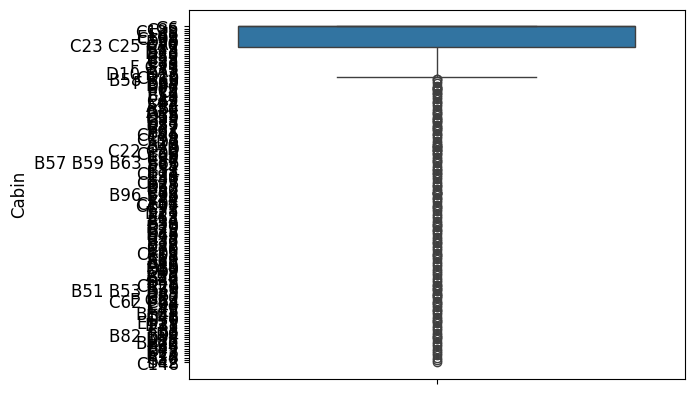

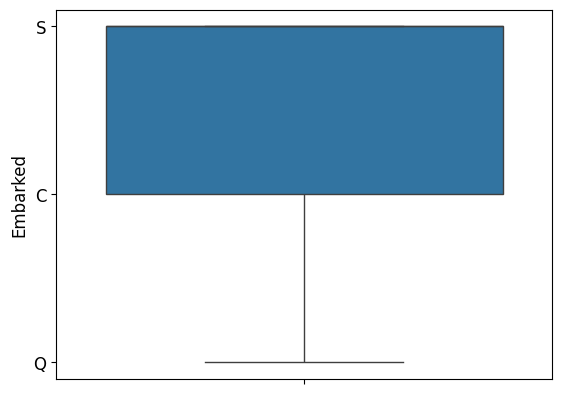

In [140]:
for col in df.columns:
  sns.boxplot(df[col])
  plt.show()

In [141]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,G6,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,14.4542,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,G6,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,G6,S


In [142]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [143]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [144]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [145]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,G6,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,14.4542,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,G6,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,G6,S


In [146]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

In [147]:
df.select_dtypes("object").columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [148]:
for col in df.select_dtypes("object").columns:
  df[col] = LabelEncoder.fit_transform(df[col])

In [149]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,108,1,22.0,1.0,0.0,523,7.2500,146,2
1,2.0,1.0,1.0,190,0,38.0,1.0,0.0,596,14.4542,82,0
2,3.0,1.0,3.0,353,0,26.0,0.0,0.0,669,7.9250,146,2
3,4.0,1.0,1.0,272,0,35.0,1.0,0.0,49,53.1000,55,2
4,5.0,0.0,3.0,15,1,35.0,0.0,0.0,472,8.0500,146,2


In [150]:
df.drop(columns=["Name", "Ticket","PassengerId"], inplace=True)

In [151]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,3.0,1,22.0,1.0,0.0,7.2500,146,2
1,1.0,1.0,0,38.0,1.0,0.0,14.4542,82,0
2,1.0,3.0,0,26.0,0.0,0.0,7.9250,146,2
3,1.0,1.0,0,35.0,1.0,0.0,53.1000,55,2
4,0.0,3.0,1,35.0,0.0,0.0,8.0500,146,2


In [152]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.027251,0.160608,NaN,0.190926,-0.279599,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.406099,-0.128272,NaN,-0.433904,0.869639,0.162098
Sex,-0.543351,0.131900,1.000000,0.052945,-0.173988,NaN,-0.102979,0.098559,0.108262
Age,-0.027251,-0.406099,0.052945,1.000000,-0.021580,NaN,0.090519,-0.340216,0.000868
SibSp,0.160608,-0.128272,-0.173988,-0.021580,1.000000,NaN,0.241798,-0.066064,-0.065764
Parch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,0.190926,-0.433904,-0.102979,0.090519,0.241798,NaN,1.000000,-0.359961,-0.023439
Cabin,-0.279599,0.869639,0.098559,-0.340216,-0.066064,NaN,-0.359961,1.000000,0.206289
Embarked,-0.167675,0.162098,0.108262,0.000868,-0.065764,NaN,-0.023439,0.206289,1.000000


In [153]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,3.0,1,22.0,1.0,0.0,7.2500,146,2
1,1.0,1.0,0,38.0,1.0,0.0,14.4542,82,0
2,1.0,3.0,0,26.0,0.0,0.0,7.9250,146,2
3,1.0,1.0,0,35.0,1.0,0.0,53.1000,55,2
4,0.0,3.0,1,35.0,0.0,0.0,8.0500,146,2


In [154]:
df.groupby("Survived").mean()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Survived,,,,,,,,
0.0,2.531876,0.852459,28.817851,0.231330,0.0,15.468944,129.040073,1.641166
1.0,1.950292,0.318713,28.121842,0.403509,0.0,20.457185,107.868421,1.368421


In [155]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Cabin,0
Embarked,0


In [156]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,3.0,1,22.0,1.0,0.0,7.2500,146,2
1,1.0,1.0,0,38.0,1.0,0.0,14.4542,82,0
2,1.0,3.0,0,26.0,0.0,0.0,7.9250,146,2
3,1.0,1.0,0,35.0,1.0,0.0,53.1000,55,2
4,0.0,3.0,1,35.0,0.0,0.0,8.0500,146,2
5,0.0,3.0,1,24.0,0.0,0.0,8.4583,146,1
6,0.0,1.0,1,54.0,0.0,0.0,51.8625,130,2
7,0.0,3.0,1,2.0,0.0,0.0,21.0750,146,2
8,1.0,3.0,0,27.0,0.0,0.0,11.1333,146,2
9,1.0,2.0,0,14.0,1.0,0.0,30.0708,117,0


In [157]:
# from sklearn.model_selection import train_test_split

# x = df[["Age", "Pclass", "Sex", "SibSp", "Parch", "Fare", "Embarked", "Cabin"]]
# y = df[["Survived"]]



In [158]:
df['Parch'].value_counts(normalize= True)


,proportion
Parch,
0.0,1.0


In [159]:
# df.drop(columns=["Parch"],inplace= True)

In [160]:
df['SibSp'].value_counts(normalize= True)

,proportion
SibSp,
0.0,0.734007
1.0,0.234568
2.0,0.031425


In [161]:
df['Survived'].value_counts(normalize= True)

,proportion
Survived,
0.0,0.616162
1.0,0.383838


In [162]:
# df.drop(columns=["SibSp"],inplace= True)

In [163]:
# df.drop(columns=["Age"],inplace= True)

In [164]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features (x) and target (y)
x = df.drop(columns=['Survived'])
y = df['Survived']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=142, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print("Shape of original training data:", x_train.shape)
print("Shape of resampled training data:", x_train_resampled.shape)
print("\nValue counts of original training target:\n", y_train.value_counts())
print("\nValue counts of resampled training target:\n", y_train_resampled.value_counts())

Shape of original training data: (712, 8)
Shape of resampled training data: (878, 8)

Value counts of original training target:
 Survived
0.0    439
1.0    273
Name: count, dtype: int64

Value counts of resampled training target:
 Survived
1.0    439
0.0    439
Name: count, dtype: int64


In [165]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3.0,1,22.0,1.0,0.0,7.2500,146,2
1,1.0,0,38.0,1.0,0.0,14.4542,82,0
2,3.0,0,26.0,0.0,0.0,7.9250,146,2
3,1.0,0,35.0,1.0,0.0,53.1000,55,2
4,3.0,1,35.0,0.0,0.0,8.0500,146,2


In [166]:
y.head()

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0


In [167]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [168]:
from sklearn.linear_model import LogisticRegression

LogisticRegression = LogisticRegression(max_iter=4000)


In [169]:
LogisticRegression.fit(x_train, y_train)

LogisticRegression(max_iter=4000)

[[93 17]
 [19 50]]


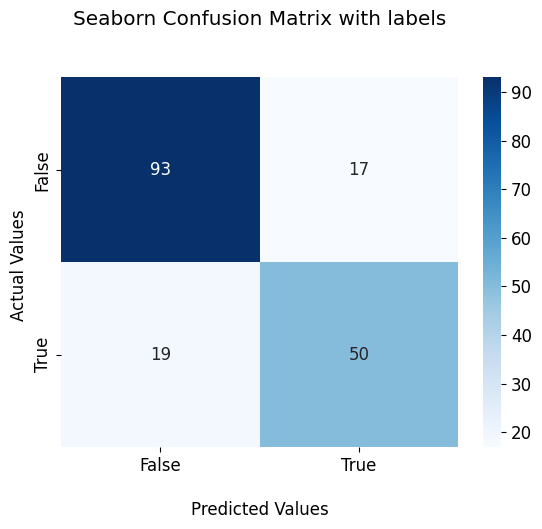

In [170]:
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix

y_pred=LogisticRegression.predict(x_test)
cf_matrix=confusion_matrix(y_test,y_pred)
print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


In [171]:
from sklearn.metrics import classification_report
from sklearn import metrics
y_pred=LogisticRegression.predict(x_test)
print(classification_report(y_test,y_pred))

accracy=metrics.accuracy_score(y_test,y_pred)
f1_score=metrics.f1_score(y_test,y_pred)
precision=metrics.precision_score(y_test,y_pred)
recall=metrics.recall_score(y_test,y_pred)

print (f'logictic regression model Accuracy - : {100*accracy:.3} %')
print (f'logictic regression model f1_score - : {100*f1_score:.3} %')
print (f'logictic regression model precision - : {100*precision:.3} %')
print (f'logictic regression model recall - : {100*recall:.3}  %')

              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84       110
         1.0       0.75      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

logictic regression model Accuracy - : 79.9 %
logictic regression model f1_score - : 73.5 %
logictic regression model precision - : 74.6 %
logictic regression model recall - : 72.5  %


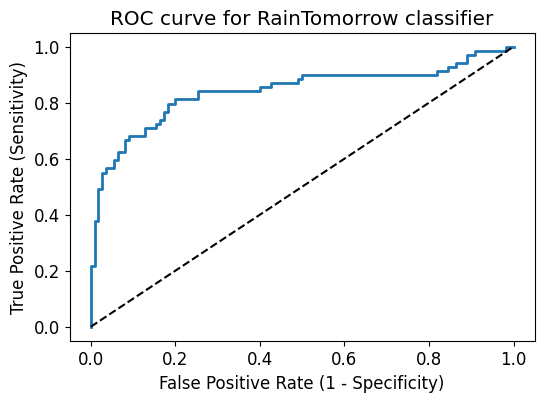

In [172]:
# plot ROC Curve

y_pred1=LogisticRegression.predict_proba(x_test)[:,1]

from sklearn.metrics import roc_curve

fpr , tpr , thresholds = roc_curve(y_test,y_pred1)

plt.figure(figsize=(6,4))

plt.plot(fpr,tpr,linewidth=2)

plt.plot([0,1],[0,1],"k--")

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


In [173]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred1)
print(f'AUC: {auc:.3f}')

AUC: 0.841


In [174]:
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,3.0,1,22.0,1.0,0.0,7.2500,146,2
1,1.0,1.0,0,38.0,1.0,0.0,14.4542,82,0
2,1.0,3.0,0,26.0,0.0,0.0,7.9250,146,2
3,1.0,1.0,0,35.0,1.0,0.0,53.1000,55,2
4,0.0,3.0,1,35.0,0.0,0.0,8.0500,146,2
